<a href="https://colab.research.google.com/github/granantuin/LEVX_class/blob/master/neural_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')
from sklearn.decomposition import PCA
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
from sklearn.metrics import confusion_matrix ,accuracy_score,f1_score,recall_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_validate
import seaborn as sns
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


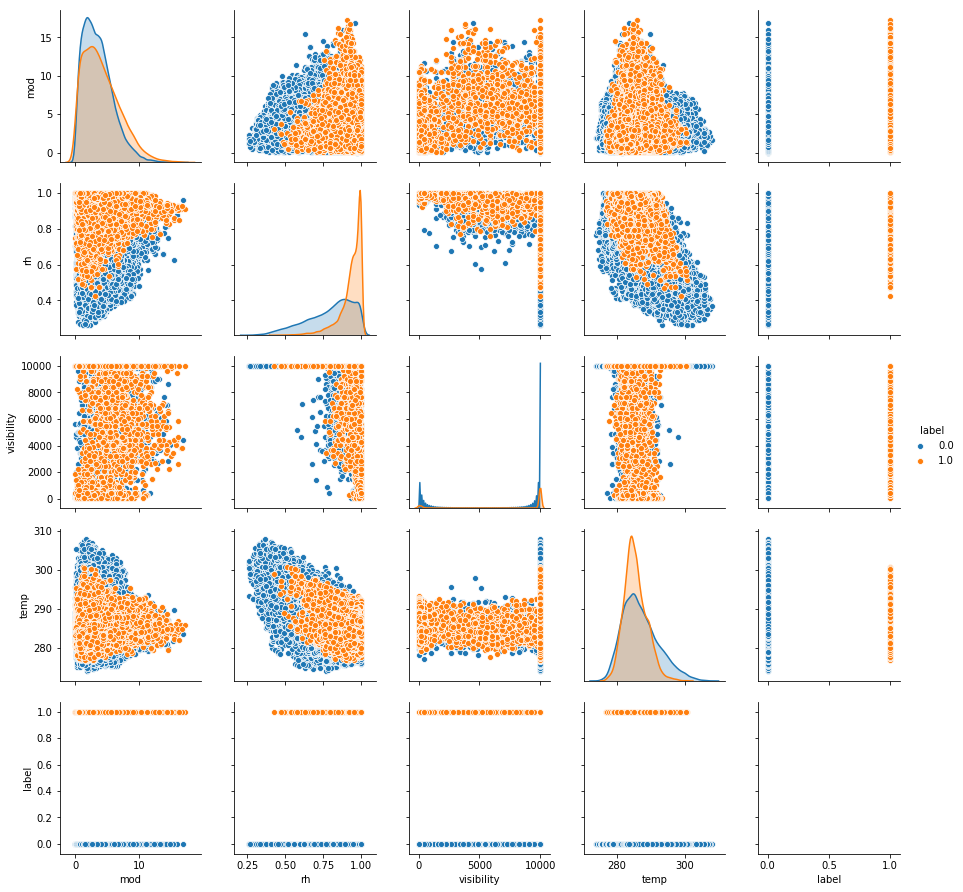

In [57]:
#range visibility 100, 500, 1000,1500,3000,5000 label "1" when higher threshold label "0" otherwise 
drive="/content/drive/My Drive/Colab Notebooks/LEVX/levx_vis_5000"
master=pd.read_csv(drive,index_col=0)
x_data=master.loc[:, ["mod","rh","visibility","temp"]]
y_data=master["label"]
sns.pairplot(master,hue="label")

In [0]:
x_data_scaled = StandardScaler().fit_transform(x_data)


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_86 (Dense)             (None, 64)                384       
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 65        
Total params: 474
Trainable params: 474
Non-trainable params: 0
_________________________________________________________________
Train on 33070 samples, validate on 33070 samples
Epoch 1/15
33070/33070 [==============================] - 4s 124us/sample - loss: 0.1404 - val_loss: 0.1139
Epoch 2/15
33070/33070 [==============================] - 3s 78us/sample - loss: 0.1127 - val_loss: 0.1035
Epoch 3/15
33070/33070 [==============================] - 3s 79us/sample - loss: 0.1026 - val_loss: 0.0983
Epoch 4/15
33

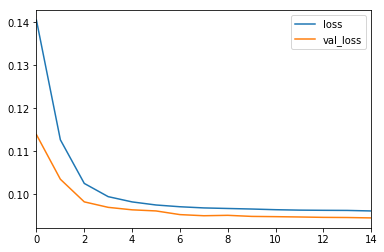

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x_data_scaled,y_data, test_size=0.5, random_state=5)
l0 = tf.keras.layers.Dense(units=5, input_shape=[4],activation="sigmoid") 
l1= tf.keras.layers.Dense(units=64,activation="sigmoid")
l2= tf.keras.layers.Dense(units=64,activation="sigmoid")
l3=tf.keras.layers.Dense(units=64,activation="sigmoid")
l4 = tf.keras.layers.Dense(units=1,activation="sigmoid")
model = tf.keras.Sequential([l0,l1,l4])
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),)
model.summary()
history = model.fit(x_train, y_train, epochs=15, verbose=True,validation_data=(x_test, y_test),batch_size=32)
print("Finished training the model")
pd.DataFrame(history.history).plot()
y_pred=model.predict(x_test)


In [0]:
recall=[]
precision=[]
f1=[]
accuracy=[]
thresholds=np.linspace(.2, .3, num=300)
for threshold in thresholds:
  
  y_pred_str=[]
  for c in y_pred:
    if c>threshold:
      y_pred_str.append("fog")
    else:
      y_pred_str.append("no_fog")
  y_pred_str=np.asarray(y_pred_str)
  y_test_str=[]
  for c in y_test:
    if c>threshold:
      y_test_str.append("fog")
    else:
      y_test_str.append("no_fog")
  y_test_str=np.asarray(y_test_str)
  index=["fog","no_fog"]
  print(pd.DataFrame(confusion_matrix(y_test_str, y_pred_str), index=index, columns=index),"threshold ",threshold)
  accuracy.append(accuracy_score(y_test_str, y_pred_str))
  results= precision_recall_fscore_support(y_test_str, y_pred_str, )
  precision.append(results[0][0])
  print("precision",results[0][0])
  recall.append(results[1][0])
  print("recall",results[1][0])
  f1.append(results[2][0])
  print("F1",results[2][0])

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


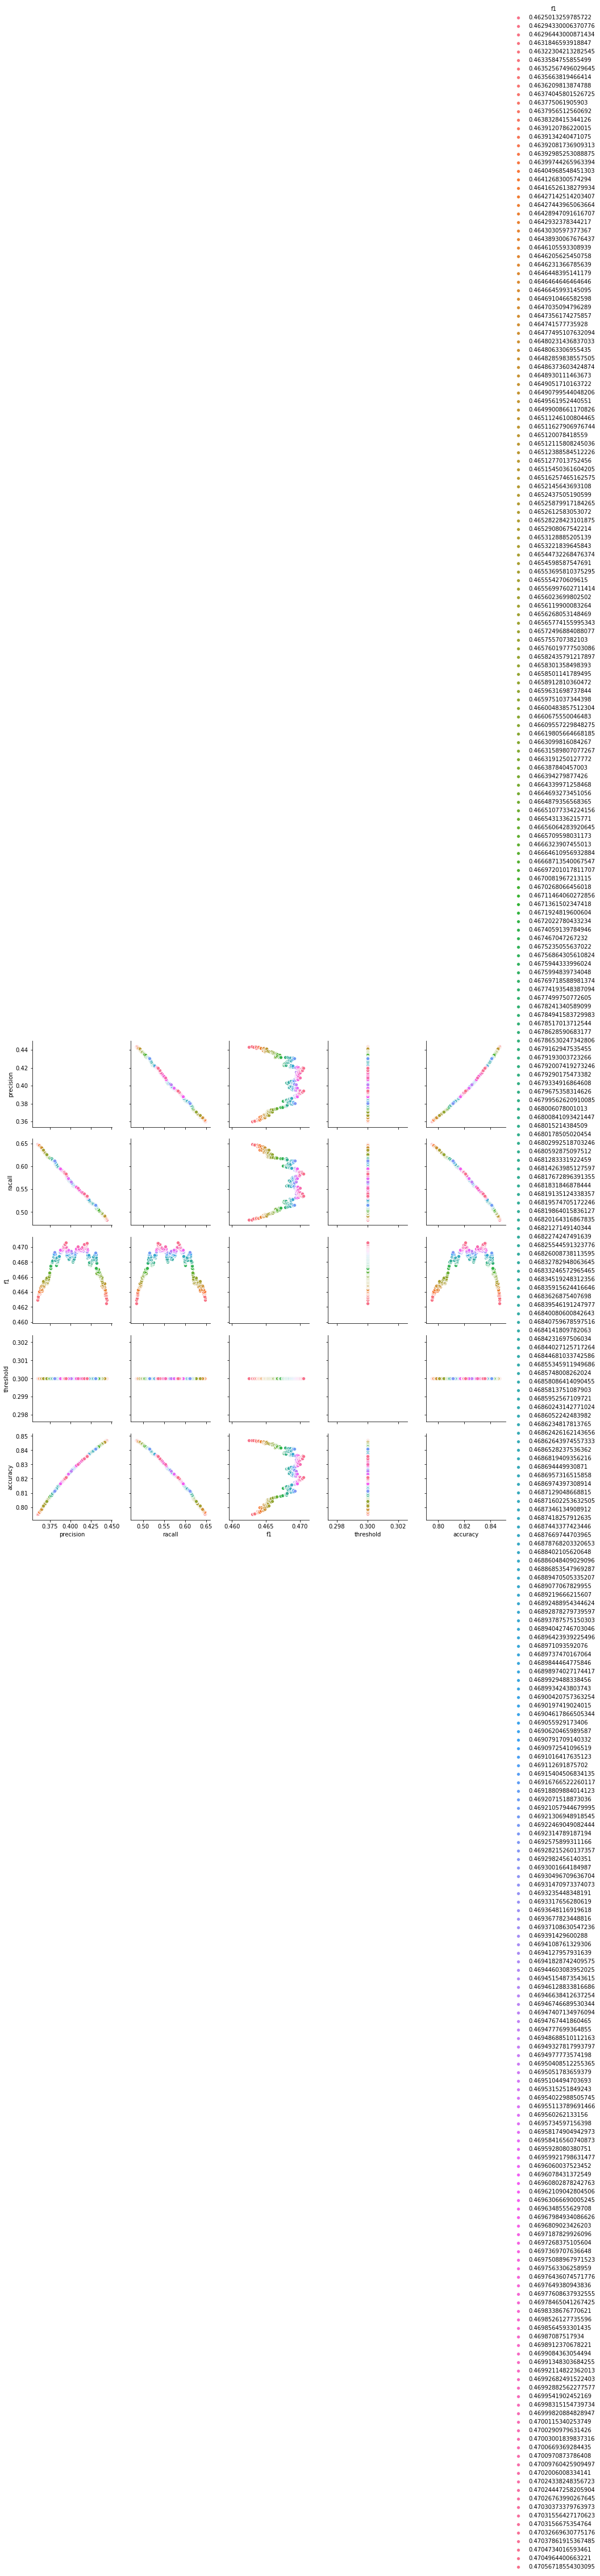

In [65]:
df2=pd.DataFrame({"precision":precision,"racall":recall,"f1":f1,"threshold":threshold,"accuracy":accuracy})
sns.pairplot(df2,hue="f1")